<a href="https://colab.research.google.com/github/Dmolight01/ProyectoModelosII/blob/main/Balanceo_de_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balanceando los datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



Puede descargarla los datos del siguiente link(base_de_datos_preprocesada)
https://drive.google.com/file/d/1iLscCDL4PIE4Kiym-BcWa9LDPPcU96qV/view?usp=sharing

Tambien puede descargarla de la carpeta del github. El archivo se llama:  base_de_datos_preprocesada.csv

In [ ]:
data = pd.read_csv('base_de_datos_preprocesada.csv')

In [ ]:
#data = data.iloc[:, 1:]

x = data.drop('Class', axis=1)
y = data['Class']

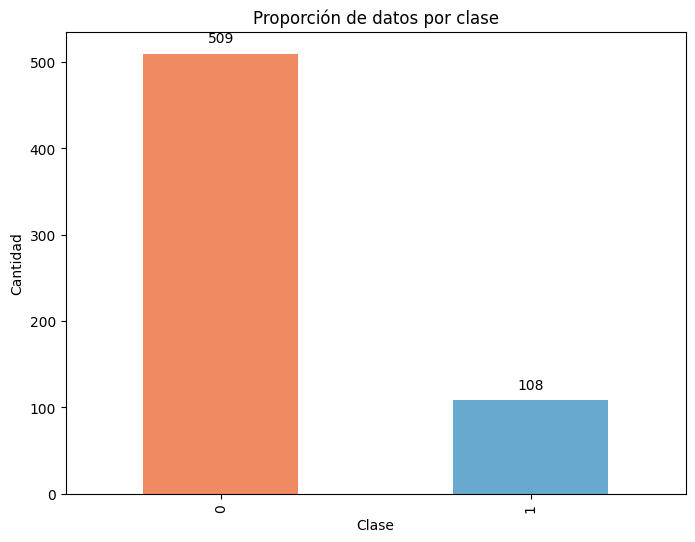

In [ ]:

class_counts = data['Class'].value_counts()

plt.figure(figsize=(8, 6))

class_counts.plot(kind='bar', color=['#ef8a62', '#67a9cf'])

# Etiquetas de texto para mostrar el número exacto de datos
for i, v in enumerate(class_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Proporción de datos por clase')

plt.show()

Se puede observar un claro desbalance de las clases.

Procedemos a utilizar Oversampler y Undersampler y analizar cual le funciona mejor a nuestros datos

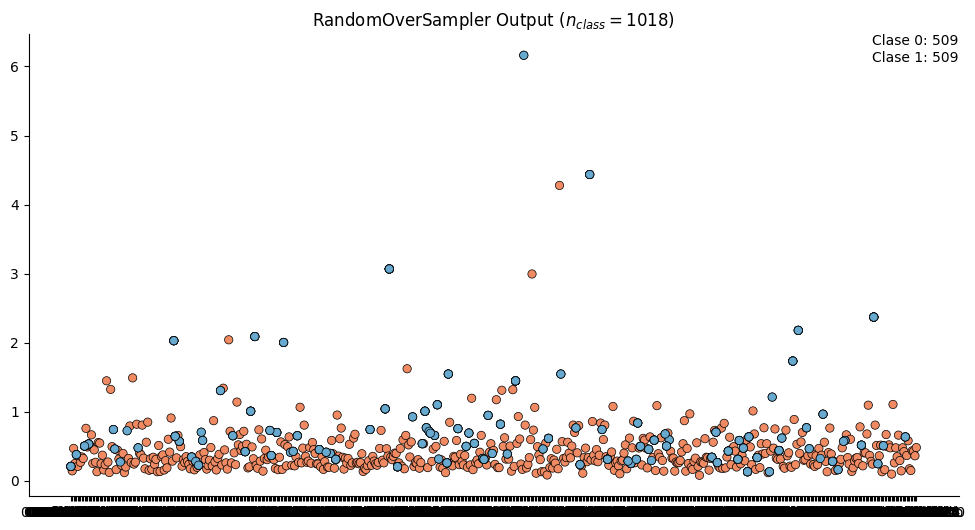

In [ ]:
# Utiliza RandomOverSampler para balancear las clases aumentando la cantidad de muestras de la clase minoritaria
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x, y)

# Convertir el DataFrame resultante de resample a un array NumPy para plotear
X_resampled = X_resampled.to_numpy()

# Gráfico para RandomOverSampler
plt.figure(figsize=(12, 6))
colors = ['#ef8a62' if v == 0 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
# Añadir etiquetas de texto para mostrar la cantidad de datos de cada clase
class_0_count = sum(1 for label in y_resampled if label == 0)
class_1_count = sum(1 for label in y_resampled if label == 1)
plt.text(plt.xlim()[1], plt.ylim()[1], f'Clase 0: {class_0_count}\nClase 1: {class_1_count}',
         verticalalignment='top', horizontalalignment='right')

sns.despine()
plt.title("RandomOverSampler Output ($n_{class}=" + str(len(y_resampled)) + "$)")
plt.show()

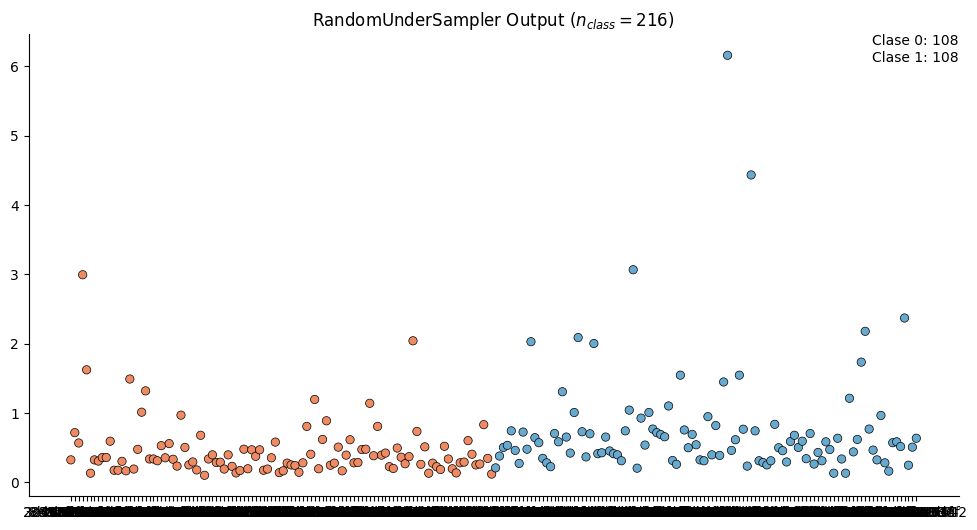

In [ ]:
# Utiliza RandomUnderSampler para balancear las clases reduciendo la cantidad de muestras de la clase mayoritaria
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x, y)

# Convertir el DataFrame resultante de resample a un array NumPy para plotear
X_resampled = X_resampled.to_numpy()

# Gráfico para RandomUnderSampler
plt.figure(figsize=(12, 6))
colors = ['#ef8a62' if v == 0 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
# Añadir etiquetas de texto para mostrar la cantidad de datos de cada clase
class_0_count = sum(1 for label in y_resampled if label == 0)
class_1_count = sum(1 for label in y_resampled if label == 1)
plt.text(plt.xlim()[1], plt.ylim()[1], f'Clase 0: {class_0_count}\nClase 1: {class_1_count}',
         verticalalignment='top', horizontalalignment='right')

sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=" + str(len(y_resampled)) + "$)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

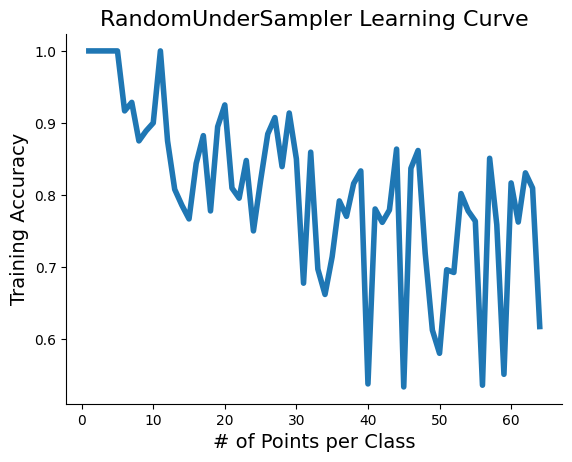

In [ ]:
def learning_curve(X, y, observations=range(1, 65)):
    scores = []
    for n in observations:
        rus = RandomUnderSampler(random_state=0, sampling_strategy={0: n, 1: n})
        X_resampled, y_resampled = rus.fit_resample(X, y)
        score = LinearSVC(max_iter=10000).fit(X_resampled, y_resampled).score(X_resampled, y_resampled)
        scores.append(score)
    return scores

# Eliminar la columna "id" antes de pasar los datos al clasificador
X = x.drop(columns=['Id'])

plt.plot(range(1, 65), learning_curve(X, y), linewidth=4)
plt.title("RandomUnderSampler Learning Curve", fontsize=16)
plt.xlabel("# of Points per Class", fontsize=14)
plt.ylabel("Training Accuracy", fontsize=14)
sns.despine()
plt.show()

Comparamos como esta el accuracy cuandos usamos los dos metodos entrenando con Random Forest

Accuracy without sampling: 0.9516129032258065
Accuracy with oversampling: [0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.94623655913

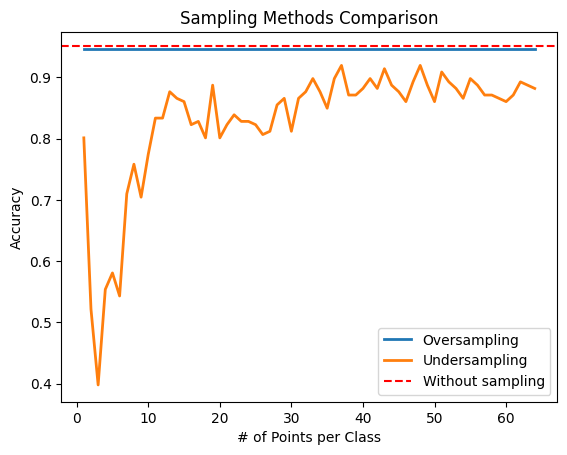

Best sampling method: Without sampling


In [ ]:
def compare_sampling_methods(X, y, test_size=0.3, observations=range(1, 65)):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Entrenar modelo sin muestreo
    model_no_sampling = RandomForestClassifier(random_state=42)
    model_no_sampling.fit(X_train, y_train)
    y_pred_no_sampling = model_no_sampling.predict(X_test)
    accuracy_no_sampling = accuracy_score(y_test, y_pred_no_sampling)

    # Entrenar modelo con oversampling
    accuracy_oversampling = []
    for n in observations:
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        model_oversampling = RandomForestClassifier(random_state=42)
        model_oversampling.fit(X_resampled, y_resampled)
        y_pred_oversampling = model_oversampling.predict(X_test)
        accuracy_oversampling.append(accuracy_score(y_test, y_pred_oversampling))

    # Entrenar modelo con undersampling
    accuracy_undersampling = []
    for n in observations:
        rus = RandomUnderSampler(random_state=42, sampling_strategy={0: n, 1: n})
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        model_undersampling = RandomForestClassifier(random_state=42)
        model_undersampling.fit(X_resampled, y_resampled)
        y_pred_undersampling = model_undersampling.predict(X_test)
        accuracy_undersampling.append(accuracy_score(y_test, y_pred_undersampling))

    return accuracy_no_sampling, accuracy_oversampling, accuracy_undersampling

# Eliminar la columna "id" antes de pasar los datos al clasificador
X = x.drop(columns=['Id'])

# Comparar rendimiento de los métodos de muestreo
accuracy_no_sampling, accuracy_oversampling, accuracy_undersampling = compare_sampling_methods(X, y)

# Imprimir precisión de cada método
print("Accuracy without sampling:", accuracy_no_sampling)
print("Accuracy with oversampling:", accuracy_oversampling)
print("Accuracy with undersampling:", accuracy_undersampling)

# Graficar resultados
plt.plot(range(1, 65), accuracy_oversampling, label="Oversampling", linewidth=2)
plt.plot(range(1, 65), accuracy_undersampling, label="Undersampling", linewidth=2)
plt.axhline(y=accuracy_no_sampling, color='r', linestyle='--', label="Without sampling")
plt.title("Sampling Methods Comparison")
plt.xlabel("# of Points per Class")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Seleccionar el mejor método
best_method = "Without sampling" if accuracy_no_sampling >= max(accuracy_oversampling) and accuracy_no_sampling >= max(accuracy_undersampling) else \
             "Oversampling" if max(accuracy_oversampling) >= max(accuracy_undersampling) else \
             "Undersampling"
print("Best sampling method:", best_method)

Como podemos observar, Oversampling funciona mucho mejor segun esta metrica en comparacion con Undersampling. Por esto escogemos Oversampling para seguir trabajando.

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x, y)


In [ ]:
# Crea un DataFrame con los datos resampleados
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Class'] = y_resampled

# Guarda el DataFrame en un archivo CSV
data_resampled.to_csv('data_resampled.csv', index=False)


In [ ]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))
print('Oversample dataset shape %s' % Counter(y_resampled))

Original dataset shape Counter({0: 509, 1: 108})
Oversample dataset shape Counter({1: 509, 0: 509})
